In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import os
import random
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import cv2
from sklearn.metrics import confusion_matrix

In [ ]:
# train_dataset_path = '/content/drive/MyDrive/DATASET A/Train'
# test_dataset_path = '/content/drive/MyDrive/DATASET A/Test'
train_dataset_path = '/content/drive/MyDrive/Dataset A2/Train'
test_dataset_path = '/content/drive/MyDrive/Dataset A2/Test'

In [ ]:
input_shape = (150, 120, 3)
batch_size = 32
epochs =25
num_folds = 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(150, 120))
        img = img_to_array(img) / 255.0  # Normalize the image
        images.append(img)
        labels.append(label)
    return images, labels

In [ ]:
healthy_images, healthy_labels = load_images_from_folder(os.path.join(train_dataset_path, 'Healthy MT'), label=0)
lesion_images, lesion_labels = load_images_from_folder(os.path.join(train_dataset_path, 'Lesion MT'), label=1)

images = healthy_images + lesion_images
labels = healthy_labels + lesion_labels

images = np.array(images)
labels = np.array(labels)

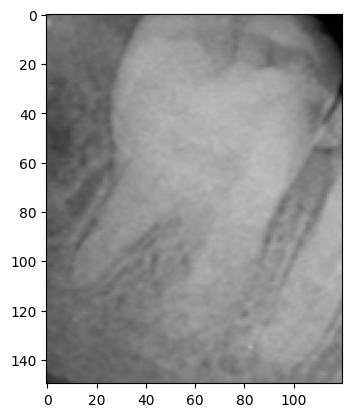

In [ ]:
plt.imshow(images[0])
plt.show()

In [ ]:
# stratified_kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# fold_accuracies1 = []

In [ ]:
folds = [
    {
        "train": [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 74, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 110, 111, 112, 114, 115, 116, 117, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 141, 142, 144, 145, 146, 148, 149, 150, 151, 153, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 171, 172, 174, 175, 179, 180, 181, 182, 183, 184, 186, 187, 188, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 208, 209, 210, 212, 214, 216, 217],
        "val": [9, 15, 16, 18, 25, 30, 45, 55, 66, 67, 73, 75, 79, 93, 96, 100, 108, 109, 113, 118, 119, 136, 139, 140, 143, 147, 152, 154, 155, 162, 170, 173, 176, 177, 178, 185, 189, 192, 194, 203, 207, 211, 213, 215]},
    {
        "train": [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 27, 30, 32, 33, 34, 36, 37, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 61, 62, 63, 64, 66, 67, 70, 71, 72, 73, 74, 75, 77, 79, 80, 81, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 96, 98, 99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 129, 130, 131, 133, 134, 135, 136, 139, 140, 141, 142, 143, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217],
        "val": [5, 12, 19, 24, 26, 28, 29, 31, 35, 38, 41, 42, 51, 56, 60, 65, 68, 69, 76, 78, 82, 84, 86, 95, 97, 101, 104, 111, 112, 122, 125, 128, 132, 137, 138, 144, 148, 161, 164, 167, 175, 184, 201, 208]},
    {
        "train": [1, 3, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 116, 118, 119, 121, 122, 123, 125, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 197, 198, 200, 201, 202, 203, 205, 206, 207, 208, 210, 211, 213, 214, 215, 217],
        "val": [0, 2, 4, 6, 10, 11, 22, 27, 32, 33, 36, 46, 61, 62, 64, 70, 77, 85, 90, 98, 114, 115, 117, 120, 124, 126, 127, 135, 142, 146, 153, 156, 158, 165, 168, 172, 181, 195, 196, 199, 204, 209, 212, 216]},

    {"train": [0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 41, 42, 45, 46, 48, 50, 51, 52, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 82, 84, 85, 86, 87, 88, 90, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 132, 135, 136, 137, 138, 139, 140, 142, 143, 144, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 164, 165, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 184, 185, 187, 188, 189, 191, 192, 194, 195, 196, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217],
     "val": [3, 7, 8, 13, 17, 23, 34, 39, 40, 43, 44, 47, 49, 53, 59, 72, 80, 81, 83, 89, 91, 94, 105, 110, 123, 131, 133, 134, 141, 145, 150, 159, 163, 166, 171, 182, 183, 186, 190, 193, 197, 198, 206]},

    {"train": [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 53, 55, 56, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 93, 94, 95, 96, 97, 98, 100, 101, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 175, 176, 177, 178, 181, 182, 183, 184, 185, 186, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 201, 203, 204, 206, 207, 208, 209, 211, 212, 213, 215, 216],
     "val": [1, 14, 20, 21, 37, 48, 50, 52, 54, 57, 58, 63, 71, 74, 87, 88, 92, 99, 102, 103, 106, 107, 116, 121, 129, 130, 149, 151, 157, 160, 169, 174, 179, 180, 187, 188, 191, 200, 202, 205, 210, 214, 217]}
]

In [ ]:
def create_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False


    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))


    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Data augmentation function (only horizontal flip)
def augment_data(image):
    # if random.random() > 0.5:
    image = np.fliplr(image)
    return image

In [ ]:
model3 = create_model()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.4802 - loss: 0.7850 - val_accuracy: 0.6364 - val_loss: 0.6117
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5394 - loss: 0.7089 - val_accuracy: 0.6591 - val_loss: 0.6227
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7151 - loss: 0.6111 - val_accuracy: 0.7045 - val_loss: 0.5831
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7689 - loss: 0.5595 - val_accuracy: 0.5909 - val_loss: 0.6164
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7344 - loss: 0.5560 - val_accuracy: 0.5455 - val_loss: 0.6486
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7457 - loss: 0.5276 - val_accuracy: 0.6818 - val_loss: 0.5512
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7828 - loss: 0.5063 - val_accuracy: 0.8636 - val_loss: 0.4333
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8182 - loss: 0.4453 - val_accuracy: 0.8409 - val_loss:

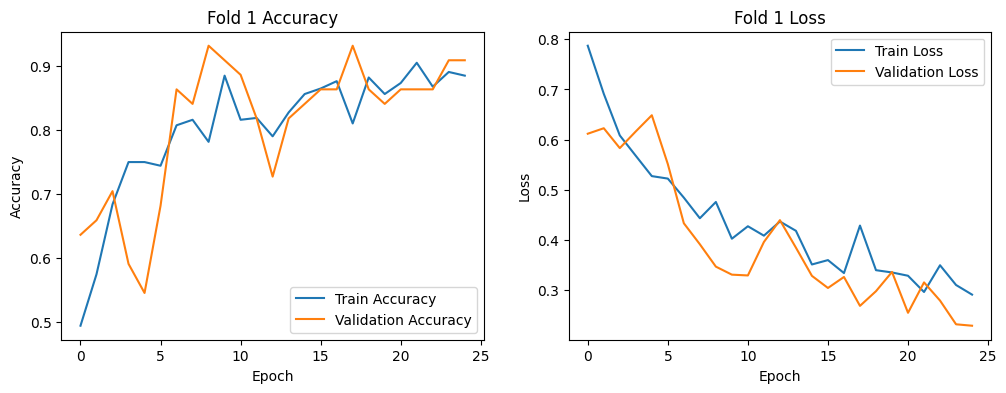

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 675ms/step - accuracy: 0.8977 - loss: 0.2490
Fold 1 - Validation Accuracy: 0.9090909361839294
Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.4995 - loss: 0.7301 - val_accuracy: 0.6364 - val_loss: 0.5937
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5639 - loss: 0.6929 - val_accuracy: 0.6818 - val_loss: 0.5543
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.6756 - loss: 0.5808 - val_accuracy: 0.6818 - val_loss: 0.5340
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.6245 - loss: 0.6249 - val_accuracy: 0.8864 - val_loss: 0.4862
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7588 - loss: 0.5228 - val_accuracy: 0.8636 - val_loss: 0.4497
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7810 - loss: 0.4812 - val_accuracy: 0.7045 - val_loss: 0.4613
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.6963 - loss: 0.5471 - val_accuracy: 0.7727 - val_loss: 0.4

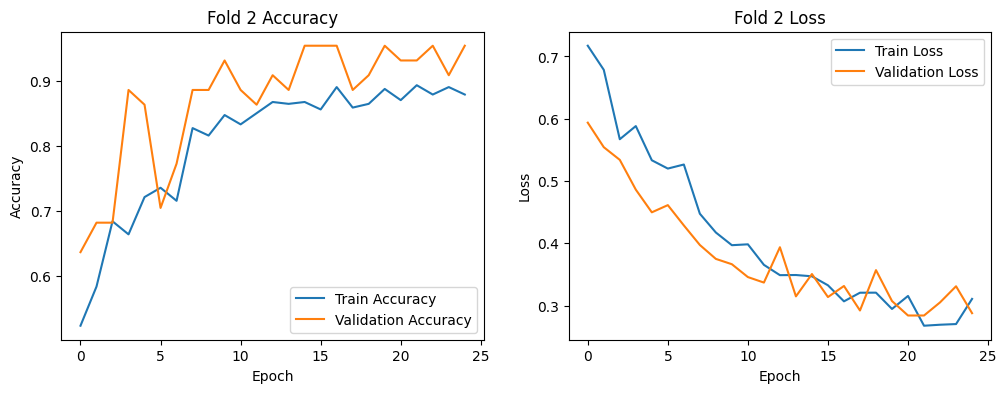

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9489 - loss: 0.3066
Fold 2 - Validation Accuracy: 0.9545454382896423
Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4662 - loss: 0.7478 - val_accuracy: 0.5455 - val_loss: 0.6313
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5320 - loss: 0.7673 - val_accuracy: 0.9773 - val_loss: 0.5641
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6088 - loss: 0.6379 - val_accuracy: 0.6136 - val_loss: 0.5229
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6056 - loss: 0.6271 - val_accuracy: 0.9091 - val_loss: 0.4828
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7083 - loss: 0.5597 - val_accuracy: 0.9091 - val_loss: 0.4410
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6865 - loss: 0.5786 - val_accuracy: 0.5455 - val_loss: 0.5404
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6513 - loss: 0.5632 - val_accuracy: 0.5455 - val_loss: 0.5019

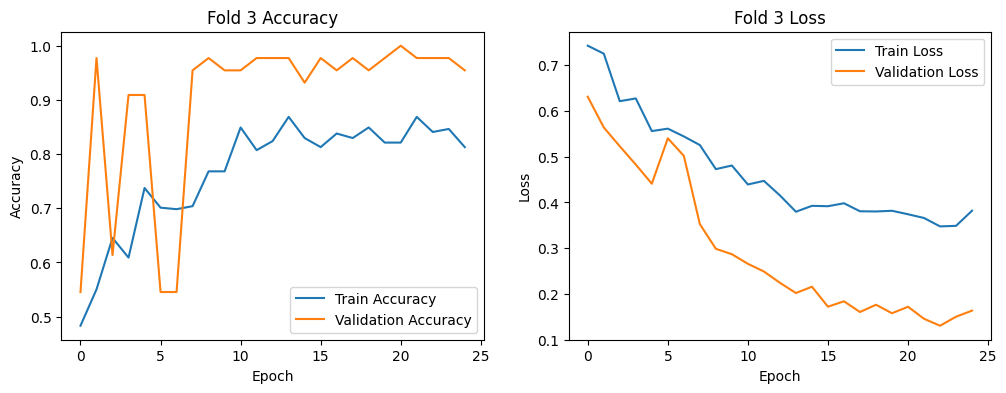

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 679ms/step - accuracy: 0.9489 - loss: 0.1662
Fold 3 - Validation Accuracy: 0.9545454382896423
Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.5429 - loss: 0.7199 - val_accuracy: 0.4651 - val_loss: 0.6563
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.6263 - loss: 0.6524 - val_accuracy: 0.4651 - val_loss: 0.6492
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5921 - loss: 0.6349 - val_accuracy: 0.4651 - val_loss: 0.6124
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7059 - loss: 0.5393 - val_accuracy: 0.8837 - val_loss: 0.4921
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8191 - loss: 0.4750 - val_accuracy: 0.9070 - val_loss: 0.4504
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7726 - loss: 0.4777 - val_accuracy: 0.8140 - val_loss: 0.4423
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8081 - loss: 0.4632 - val_accuracy: 0.9302 - val_loss: 0.4

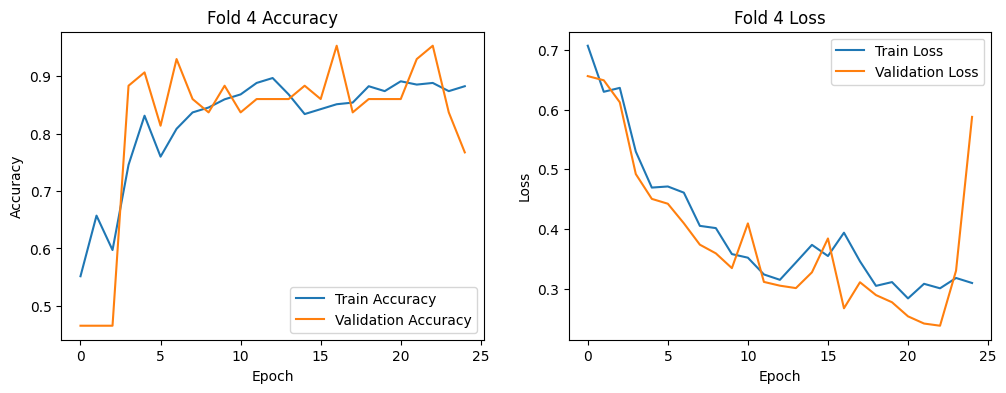

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7929 - loss: 0.5240
Fold 4 - Validation Accuracy: 0.7674418687820435
Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.5119 - loss: 0.7504 - val_accuracy: 0.7907 - val_loss: 0.6472
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.6158 - loss: 0.6579 - val_accuracy: 0.4884 - val_loss: 0.6361
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7248 - loss: 0.5793 - val_accuracy: 0.4884 - val_loss: 0.6440
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6959 - loss: 0.5557 - val_accuracy: 0.4884 - val_loss: 0.7385
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6631 - loss: 0.5843 - val_accuracy: 0.8140 - val_loss: 0.5336
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8687 - loss: 0.4636 - val_accuracy: 0.7907 - val_loss: 0.4965
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8205 - loss: 0.4457 - val_accuracy: 0.8140 - val_loss: 0.4874

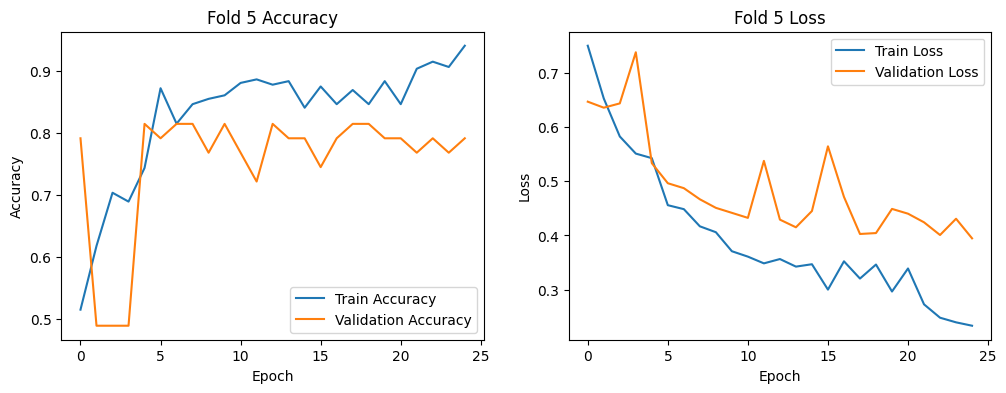

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 652ms/step - accuracy: 0.7875 - loss: 0.3940
Fold 5 - Validation Accuracy: 0.7906976938247681


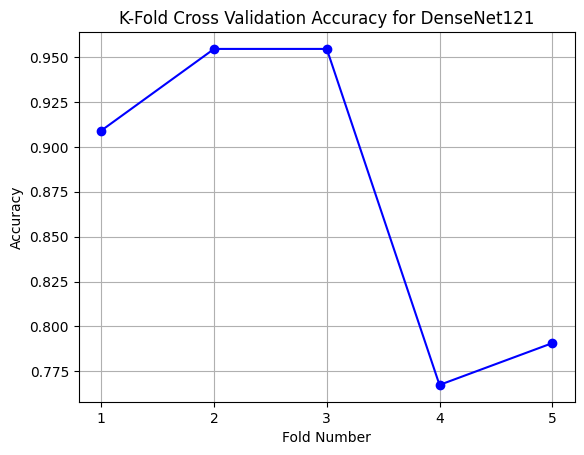


Average Validation Accuracy across 5 folds: 0.8752642750740052


In [ ]:
fold_accuracies3=[]
for fold, fold_data in enumerate(folds):
    train_idx = fold_data['train']
    val_idx = fold_data['val']


    train_images, val_images = images[train_idx], images[val_idx]
    train_labels, val_labels = labels[train_idx], labels[val_idx]

    augmented_train_images = np.array(
        [augment_data(img) for img in train_images]
    )


    combined_train_images = np.concatenate((train_images, augmented_train_images))
    combined_train_labels = np.concatenate((train_labels, train_labels))

    val_images = np.array(val_images)

    model = create_model()
    history1= model.fit(
        combined_train_images, combined_train_labels,
        validation_data=(val_images, val_labels),
        epochs=epochs,
        batch_size=batch_size
    )

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Train Accuracy')
    plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold + 1} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Train Loss')
    plt.plot(history1.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold + 1} Loss')
    plt.legend()
    plt.show()


    val_loss, val_accuracy = model.evaluate(val_images, val_labels)
    print(f"Fold {fold + 1} - Validation Accuracy: {val_accuracy}")
    fold_accuracies3.append(val_accuracy)

plt.plot(range(1, num_folds + 1), fold_accuracies3, marker='o', linestyle='-', color='b')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross Validation Accuracy for DenseNet121')
plt.xticks(range(1, num_folds + 1))
plt.grid(True)
plt.show()

print(f"\nAverage Validation Accuracy across {num_folds} folds: {np.mean(fold_accuracies3)}")

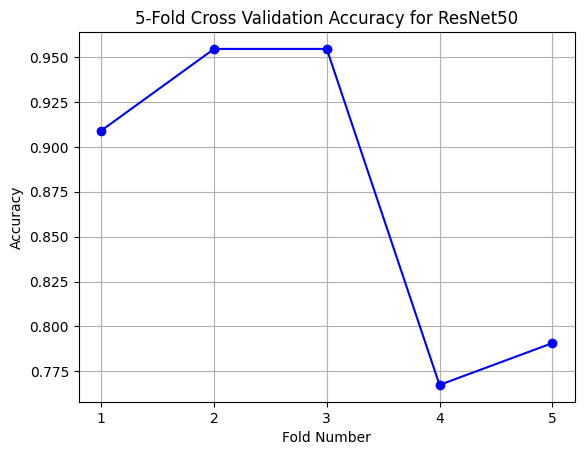

In [ ]:
plt.plot(range(1, 6), fold_accuracies3, marker='o', linestyle='-', color='b')

plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross Validation Accuracy for ResNet50')

plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

In [ ]:
print(f"\nAverage Validation Accuracy across {num_folds} folds: {np.mean(fold_accuracies3)}")


Average Validation Accuracy across 5 folds: 0.8752642750740052


In [ ]:
fold_accuracies3

[0.9090909361839294,
 0.9545454382896423,
 0.9545454382896423,
 0.7674418687820435,
 0.7906976938247681]

In [ ]:
test_images = []
test_labels = []

In [ ]:
for class_name in os.listdir(test_dataset_path):
    class_path = os.path.join(test_dataset_path, class_name)
    label = 0 if class_name == "Healthy MT" else 1

    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)

        # Load and preprocess the image
        img = load_img(img_path, target_size=(150, 120))
        img = img_to_array(img) / 255.0  # Normalize the image

        # Original image
        test_images.append(img)
        test_labels.append(label)

        # Horizontally flipped image
        flipped_img = np.fliplr(img)
        test_images.append(flipped_img)
        test_labels.append(label)

# Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
test_loss3, test_accuracy3 = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy3}")

predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten()

print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, predicted_classes))
print("\nClassification Report:")
print(classification_report(test_labels, predicted_classes, target_names=["Healthy", "Lesion"]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9375 - loss: 0.2692
Test Accuracy: 0.9375
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step

Confusion Matrix:
[[21  3]
 [ 0 24]]

Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      0.88      0.93        24
      Lesion       0.89      1.00      0.94        24

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



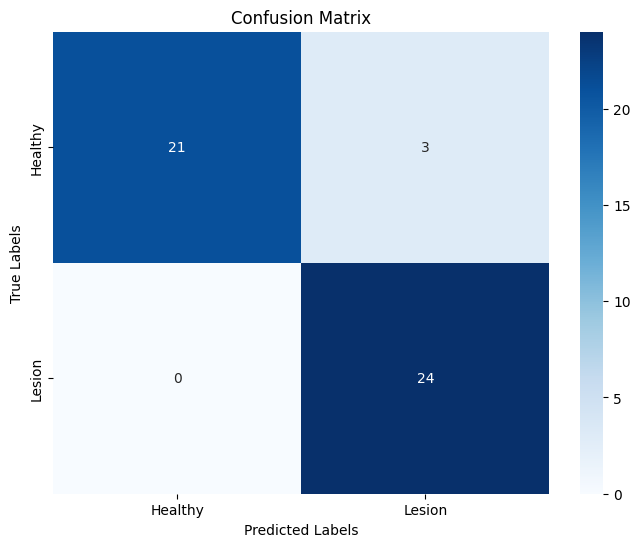

In [ ]:
def plot_confusion_matrix(true_labels, predicted_classes, class_names):
    cm = confusion_matrix(true_labels, predicted_classes)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

plot_confusion_matrix(test_labels, predicted_classes, class_names=["Healthy", "Lesion"])

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


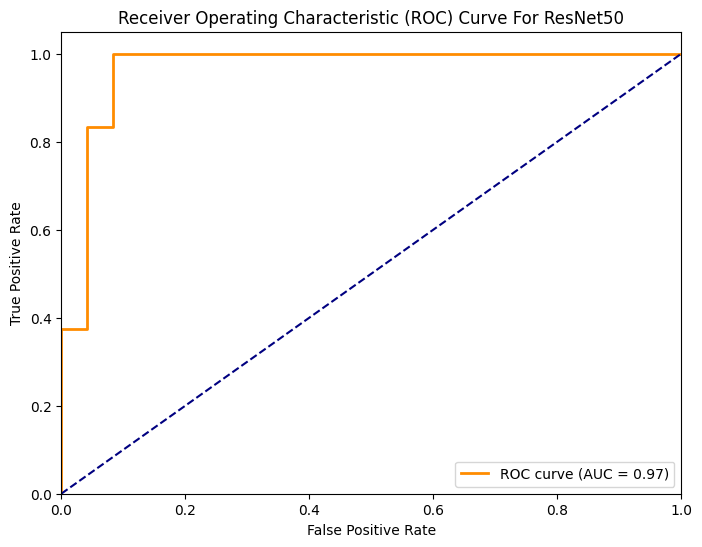

In [ ]:
true_labels = test_labels
predicted_probs = model.predict(test_images)

def plot_roc_curve(true_labels, predicted_probs):
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve For ResNet50')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(true_labels, predicted_probs)